In [0]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm
import seaborn as sns
import numpy as np
sns.set(font_scale=2)

import warnings
warnings.filterwarnings("ignore")

## **ЗАДАНИЕ 1**

Статистика Краскела-Уоллиса:
$$W = (N - 1) \frac{\sum_{j = 1}^{k} n_j (r_{j.} - r_{..})^2}{\sum_{j=1}^k\sum_{i = 1}^{n_j}(r_{ij} - r_{..})^2}$$

Пусть нет совпадающих элементов $x_{ij}$, тогда статистика имеет следующий вид:

$$W = \Big[\frac{12}{N(N+1)} \sum_{j = 1}^{k}\frac{S_{j}^2}{n_{j}}\Big] - 3(N+1)$$ где $S_{j} = \sum_{i=1}^{n_j}r_{ij}$

Тогда
$$\frac{S_{j}^2}{n_{j}} = \frac{(\sum_{i=1}^{n_j}r_{ij})^2}{n_{j}} = n_{j}\Big(\frac{\sum_{i=1}^{n_j}r_{ij}}{n_{j}}\Big)^2 \leq_{(*)} n_{j}\frac{\sum_{i=1}^{n_j}(r_{ij})^2}{n_{j}} = \sum_{i=1}^{n_{j}}(r_{ij})^2$$

Таким образом, максимум достигается, когда квадрат суммы рангов в j-й группе равен сумме квадратов рангов в этой группе умноженной на количество элементов в этой группе:
$(\sum_{i=1}^{n_j}r_{ij})^2 = n_{j}\sum_{i=1}^{n_{j}}(r_{ij})^2$

Тогда статистика равна:
$$W = \Big[\frac{12}{N(N+1)} \sum_{j = 1}^{k}\sum_{i=1}^{n_{j}}(r_{ij})^2\Big] - 3(N+1)$$

(*) Тут использовалось неравенство. $\varphi\left(\frac{\sum x_i}{n}\right) \le \frac{\sum \varphi (x_i)}{n}$

Еще можно отметить, что $W \sim \chi^2(k-1)$, где k -- число групп, и максимум статистики достигается на максимуме хи2 распределения с df = k.

## **ЗАДАНИЕ 2**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving figure_skating.csv to figure_skating.csv


In [0]:
data = pd.read_csv('figure_skating.csv')

In [8]:
data.head()

,Rank,Athlete,Result,Notes
0,G,Adelina SOTNIKOVARUS,224.59,NaN
1,S,Yuna KIMKOR,219.11,NaN
2,B,Carolina KOSTNERITA,216.73,NaN
3,4,Gracie GOLDUSA,205.53,NaN
4,5,Yulia LIPNITSKAYARUS,200.57,NaN


Преобразуем данные тремя способами

In [0]:
from sklearn.preprocessing import quantile_transform
from scipy.stats import boxcox

unif = (data['Result'].dropna().values).reshape(-1, 1)
quantile_transform(unif, output_distribution='uniform')
unif = unif.reshape(1,-1)[0]

gaus = (data['Result'].dropna().values).reshape(-1, 1)
quantile_transform(gaus, output_distribution='normal')
gaus = gaus.reshape(1,-1)[0]

vals = data['Result'].dropna().values
box, _ = boxcox(vals)

Посмотрим на результат преобразования, нарисовав гистограммы

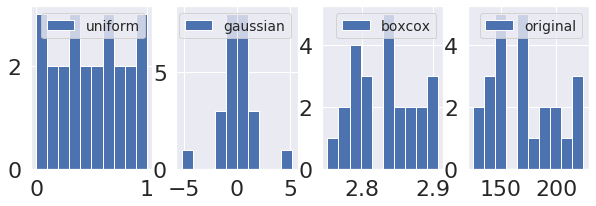

In [10]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.hist(unif, label='uniform')
plt.legend(fontsize='xx-small')

plt.subplot(1, 4, 2)
plt.hist(gaus, label='gaussian')
plt.legend(fontsize='xx-small')

plt.subplot(1, 4, 3)
plt.hist(box, label='boxcox')
plt.legend(fontsize='xx-small')

plt.subplot(1, 4, 4)
plt.hist(vals, label='original')
plt.legend(fontsize='xx-small')

plt.show()

Применим тест Шапиро-Уилка проверки на нормальность

In [11]:
print('uniform: ', stats.shapiro(unif))
print('normal: ', stats.shapiro(gaus))
print('boxcox: ', stats.shapiro(box))

uniform:  (0.9588580131530762, 0.41591137647628784)
normal:  (0.8654237985610962, 0.004284990020096302)
boxcox:  (0.959534227848053, 0.4291362166404724)


Теперь нарисуем QQ-плот изначальных оценок против преобразованных.

In [0]:
import statsmodels.api as sm

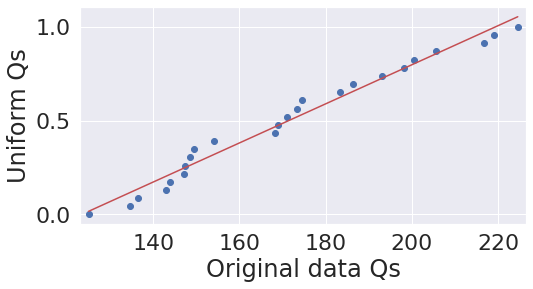

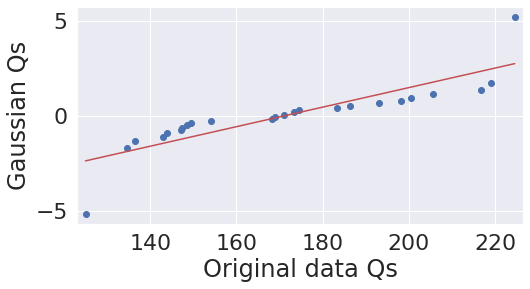

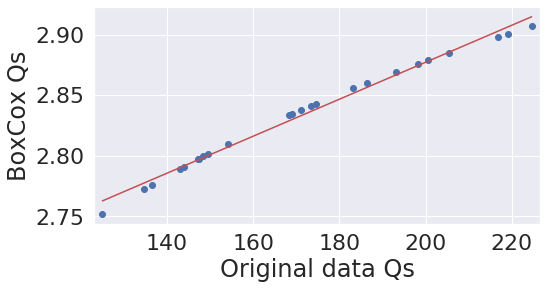

In [13]:
vals = data['Result'].dropna().values
# vals = sm.ProbPlot(vals)

fig1 = sm.qqplot_2samples(sm.ProbPlot(unif), vals, ylabel='Uniform Qs', xlabel='Original data Qs', line='r')
fig2 = sm.qqplot_2samples(sm.ProbPlot(gaus), vals, ylabel='Gaussian Qs', xlabel='Original data Qs', line='r')
fig3 = sm.qqplot_2samples(sm.ProbPlot(box), vals, ylabel='BoxCox Qs', xlabel='Original data Qs', line='r')
fig1.set_figheight(4)
fig1.set_figwidth(8)
fig2.set_figheight(4)
fig2.set_figwidth(8)
fig3.set_figheight(4)
fig3.set_figwidth(8)
plt.show()

Данный QQ-плот сравнивает два распределения: изначальное и преобразованное. Из графиков хорошо видно, что наиболее схожее с изначальными оценками имеет boxcox преобразованные. Кроме того тест Шапиро показал p-value = 0.42 и, например, при alpha=0.5, это будет говорить о том, что данное преобразование прошло проверку на нормальность (можно еще нарисовать qq плот преобразованного распределения vs нормальное).

Для дальнейшего анализа предпочтителен BoxCox transformation, так как нам необходима не только нормальность групп, но и равенство дисперсий. Бокс-Кокс же стабилизирует дисперсию и устраняет гетероскедастичность.

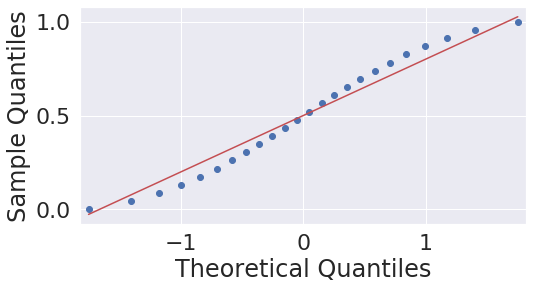

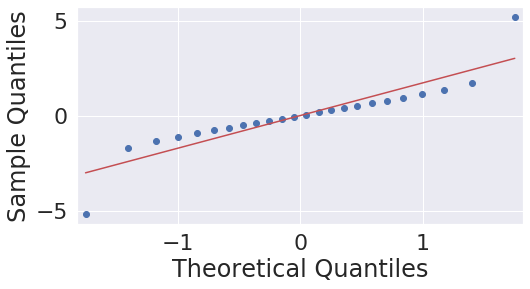

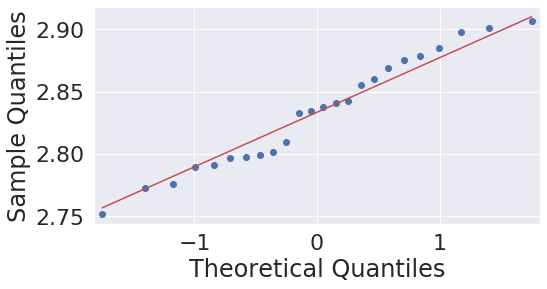

In [14]:
fig1 = sm.qqplot(unif, line='s')
fig2 = sm.qqplot(gaus, line='s')
fig3 = sm.qqplot(box, line='s')
fig1.set_figheight(4)
fig1.set_figwidth(8)
fig2.set_figheight(4)
fig2.set_figwidth(8)
fig3.set_figheight(4)
fig3.set_figwidth(8)
plt.show()

Отсюда видно, что у квантильного преобразования с равномерным распредлением есть небольшие хвосты, у квантильного преобразования с гауссовым распределением очень тяжелые хвосты.

## **ЗАДАНИЕ 3**

In [15]:
! pip install pingouin

     |████████████████████████████████| 215kB 4.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.0-cp36-none-any.whl size=211662 sha256=1eac06a30e084662829eb93437209037127cee6fae4eaa9f132cdf61dd5d70e7
  Stored in directory: /root/.cache/pip/wheels/63/77/53/3b0312ca8a50325c6995cc9a205784b64f8ba08872f91375b9
Successfully built pingouin


In [0]:
import pingouin

Функция, которая считает эмпирическую ошибку 1 рода или мощность, зависит от вектора mu, подаваемого на вход.

То есть если Н0 верна (mu_1 = mu_2 = mu_3), то функция считает alpha, иначе 1-beta

In [0]:
def func(n, sigma, mu):
  alpha = 0.05

  aF, aW, aK = [], [], []
  F_stat, W_stat, K_stat = [], [], []

  for i in range(len(n)):
    ni = n[i]
    Ntimes = 1000

    pFs, pWs, pKs = [], [], []
    Fs,  Ws,  Ks  = [], [], []

    for j in range(Ntimes):
      X1 = np.random.normal(mu[0], sigma[0], ni[0])
      X2 = np.random.normal(mu[1], sigma[1], ni[1])
      X3 = np.random.normal(mu[2], sigma[2], ni[2])

      y1 = [1 for i in range(ni[0])]
      y2 = [2 for i in range(ni[1])]
      y3 = [3 for i in range(ni[2])]
      X = np.hstack((X1, X2, X3))
      y = np.hstack((y1, y2, y3))
      df = pd.DataFrame(list(zip(X, y)), columns = ['X', 'group'])

      mod = ols(formula='X ~ C(group)', data=df).fit()
      mod = anova_lm(mod)
      Fs.append(mod['F'][0])
      pFs.append(mod['PR(>F)'][0])
      
      mod2 = pingouin.welch_anova(dv='X', between='group', data=df)
      Ws.append(mod2['F'])
      pWs.append(mod2['p-unc'][0])

      mod3 = pingouin.kruskal(dv='X', between='group', data=df)
      Ks.append(mod3['H'])
      pKs.append(mod3['p-unc'][0])

    aF.append((pFs < (alpha * np.ones(Ntimes))).sum() / Ntimes)
    aW.append((pWs < (alpha * np.ones(Ntimes))).sum() / Ntimes)
    aK.append((pKs < (alpha * np.ones(Ntimes))).sum() / Ntimes)

    F_stat.append(np.mean(Fs))
    K_stat.append(np.mean(Ks))
    W_stat.append(np.mean(Ws))

  return aF, aW, aK, F_stat, K_stat, W_stat

(a). Сбалансированные выборки из N(0,1), группы размера n = 5,10,20,100

In [0]:
n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
mu = [0,0,0]
sigma = [1,1,1]

aF, aW, aK, F_stat, W_stat, K_stat = func(n, sigma, mu)

In [41]:
pvals01 = pd.DataFrame(list(aF), index=[5,10,20,100], columns=['F-test'])
pvals01['Welch'] = list(aW)
pvals01['Kruskall'] = list(aK)
pvals01

,F-test,Welch,Kruskall
5,0.048,0.029,0.042
10,0.044,0.053,0.043
20,0.038,0.033,0.036
100,0.062,0.065,0.069


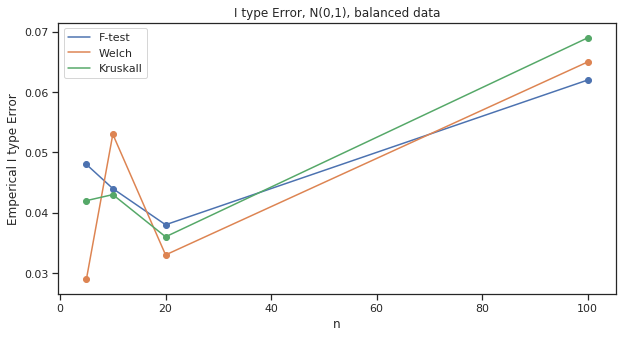

In [42]:
plt.figure(figsize=(10, 5))
plt.plot([5, 10, 20, 100], aF, label='F-test')
plt.plot([5, 10, 20, 100], aW, label='Welch')
plt.plot([5, 10, 20, 100], aK, label='Kruskall')
plt.scatter([5, 10, 20, 100], aF)
plt.scatter([5, 10, 20, 100], aW)
plt.scatter([5, 10, 20, 100], aK)
plt.xlabel('n')
plt.ylabel('Emperical I type Error')
plt.title('I type Error, N(0,1), balanced data')
plt.legend()
plt.show()

In [21]:
stats01 = pd.DataFrame(list(F_stat), index=[5, 10, 20, 100], columns=['F-test'])
stats01['Welch'] = list(W_stat)
stats01['Kruskall'] = list(K_stat)
stats01

,F-test,Welch,Kruskall
5,1.243086,2.052160,1.373515
10,1.075978,2.003236,1.128111
20,1.055793,2.046950,1.073523
100,0.951734,1.882395,0.952293


С ростом выборок альфа резко выросла для всех тестов, причем когда этот пункт тестировался до этого, наоборот, при росте выборок альфа резко падала. => в данном оптимальным вариантом будут средние выборки

(b). Сбалансированные выборки из N(0,sigma), группы размера n = 5,10,20,100.
sigma -- случайная тройка из элементов 1,2,3,4

In [0]:
from itertools import permutations

n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
mu = [0,0,0]

sigmas = [1,1,1]
saved_sigmas = []
permuted=[]

gaF, gaW, gaK = [], [], []
gF_stat, gW_stat, gK_stat = [], [], []

for q in range(3):
  while (sigmas[0] == sigmas[1] and sigmas[1] == sigmas[2] or list(sigmas) in permuted):
    sigmas = np.random.choice([1,2,3,4], 3)
  saved_sigmas.append(list(sigmas))
  permuted.extend(list(map(list, list(permutations(sigmas)))))

  aF, aW, aK, F_stat, W_stat, K_stat = func(n, sigmas, mu)

  gaF.append(aF)
  gaW.append(aW)
  gaK.append(aK)
  gF_stat.append(F_stat)
  gK_stat.append(K_stat)
  gW_stat.append(W_stat)

In [0]:
sig = []
ind = []
f = []
w = []
k = []
for j in range(3):
  sig.extend([str(saved_sigmas[j]) for i in range(4)])
  ind.extend([5,10,20,100])
  f.extend(gaF[j])
  w.extend(gaW[j])
  k.extend(gaK[j])

Сигмы выбирались случайно! (так написано в задании)

In [24]:
pvals02 = pd.DataFrame(sig, index=ind, columns=['sigma'])
pvals02['F-test'] = f
pvals02['Welch'] = w
pvals02['Kruskall'] = k
pvals02

,sigma,F-test,Welch,Kruskall
5,"[1, 3, 4]",0.078,0.051,0.058
10,"[1, 3, 4]",0.067,0.049,0.061
20,"[1, 3, 4]",0.058,0.050,0.071
100,"[1, 3, 4]",0.061,0.052,0.067
5,"[1, 2, 2]",0.046,0.044,0.047
10,"[1, 2, 2]",0.054,0.050,0.060
20,"[1, 2, 2]",0.046,0.044,0.047
100,"[1, 2, 2]",0.059,0.064,0.067
5,"[4, 3, 3]",0.044,0.041,0.041
10,"[4, 3, 3]",0.057,0.054,0.045


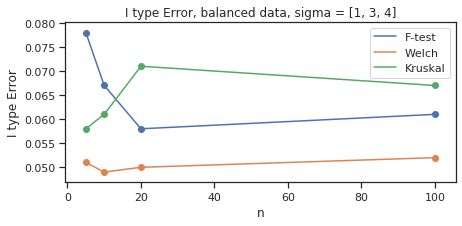

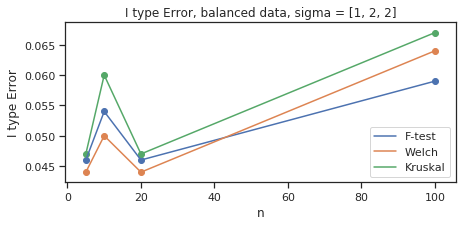

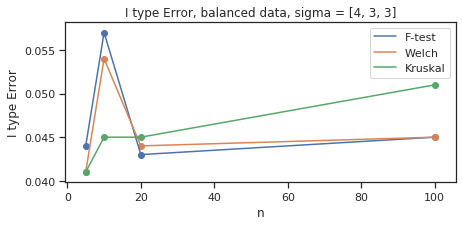

In [25]:
tmp = [5,10,20,100]
for i in range(3):
  plt.figure(figsize=(7, 10))
  plt.subplot(3, 1, i + 1)
  plt.plot(tmp, gaF[i], label='F-test')
  plt.plot(tmp, gaW[i], label='Welch')
  plt.plot(tmp, gaK[i], label='Kruskal')
  plt.scatter(tmp, gaF[i])
  plt.scatter(tmp, gaW[i])
  plt.scatter(tmp, gaK[i])
  plt.xlabel('n')
  plt.ylabel('I type Error')
  plt.title('I type Error, balanced data, sigma = %s' % sig[i + 3*i])
  plt.legend()
  plt.show()

(c). Несбалансированные выборки из N(0,1), группы размера n = 5,10,20,100

In [0]:
mu = [0,0,0]

sigmas = [1,1,1]

n = []

for i in range(4):
  n.append(list(np.random.choice([5,10,20,100], 3)))

aF, aW, aK, F_stat, W_stat, K_stat = func(n, sigmas, mu)

In [27]:
ind_n1 = [x[0] for x in n]
ind_n2 = [x[1] for x in n]
ind_n3 = [x[2] for x in n]
pvals03 = pd.DataFrame(ind_n1, columns=['n1'])
pvals03['n2'] = ind_n2
pvals03['n3'] = ind_n3
pvals03['F-test'] = list(aF)
pvals03['Welch'] = list(aW)
pvals03['Kruskall'] = list(aK)
pvals03

,n1,n2,n3,F-test,Welch,Kruskall
0,100,5,5,0.046,0.053,0.038
1,20,5,20,0.041,0.048,0.041
2,100,10,100,0.056,0.049,0.049
3,10,100,20,0.058,0.056,0.049


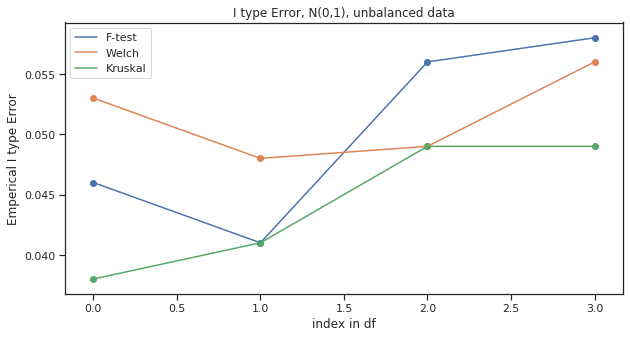

In [28]:
plt.figure(figsize=(10, 5))
x = np.arange(0, 4)
plt.plot(x, pvals03['F-test'], label='F-test')
plt.plot(x, pvals03['Welch'], label='Welch')
plt.plot(x, pvals03['Kruskall'], label='Kruskal')
plt.scatter(x, pvals03['F-test'])
plt.scatter(x, pvals03['Welch'])
plt.scatter(x, pvals03['Kruskall'])
plt.xlabel('index in df')
plt.ylabel('Emperical I type Error')
plt.title('I type Error, N(0,1), unbalanced data')
plt.legend()
plt.show()

На несбалансированной выборке тесты ведут себя довольно странно и непредсказуемо.

(d). Сбалансированные выборки из N(mu, 1), mu = 0, 1, 2.

In [0]:
n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
sigmas = [1,1,1]

mus = [[0,1,2], [0,0,1], [0,0,2], [1,1,0], [1,1,2], [2,2,0], [2,2,1]]

gaF, gaW, gaK = [], [], []
gF_stat, gW_stat, gK_stat = [], [], []

for mu in mus:

  aF, aW, aK, F_stat, W_stat, K_stat = func(n, sigmas, mu)

  gaF.append(aF)
  gaW.append(aW)
  gaK.append(aK)
  gF_stat.append(F_stat)
  gK_stat.append(K_stat)
  gW_stat.append(W_stat)

In [30]:
gaF

[[0.686, 0.978, 1.0, 1.0],
 [0.258, 0.569, 0.908, 1.0],
 [0.812, 0.996, 1.0, 1.0],
 [0.241, 0.566, 0.914, 1.0],
 [0.274, 0.58, 0.9, 1.0],
 [0.835, 0.997, 1.0, 1.0],
 [0.304, 0.585, 0.89, 1.0]]

In [0]:
m = []
ind = []
f = []
w = []
k = []
for j in range(len(gaF)):
  m.extend([str(mus[j]) for i in range(4)])
  ind.extend([5,10,20,100])
  f.extend(gaF[j])
  w.extend(gaW[j])
  k.extend(gaK[j])

In [32]:
pvals04 = pd.DataFrame(m, index=ind, columns=['mus'])
pvals04['F-test'] = f
pvals04['Welch'] = w
pvals04['Kruskall'] = k
pvals04

,mus,F-test,Welch,Kruskall
5,"[0, 1, 2]",0.686,0.617,0.651
10,"[0, 1, 2]",0.978,0.972,0.962
20,"[0, 1, 2]",1.000,1.000,1.000
100,"[0, 1, 2]",1.000,1.000,1.000
5,"[0, 0, 1]",0.258,0.225,0.230
10,"[0, 0, 1]",0.569,0.547,0.526
20,"[0, 0, 1]",0.908,0.904,0.883
100,"[0, 0, 1]",1.000,1.000,1.000
5,"[0, 0, 2]",0.812,0.727,0.758
10,"[0, 0, 2]",0.996,0.994,0.994


Тут неправильно подписан график, везде должна быть мощность, а не ошибка 1 рода

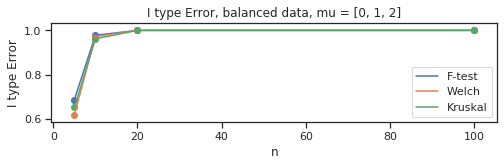

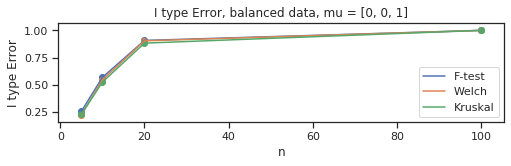

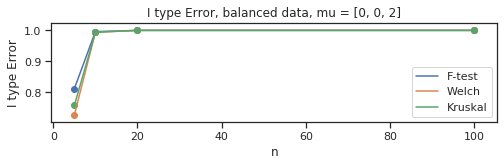

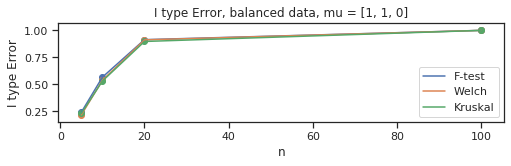

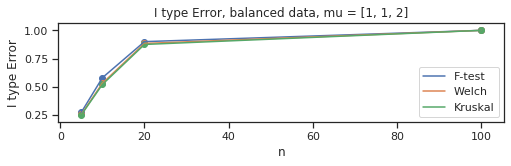

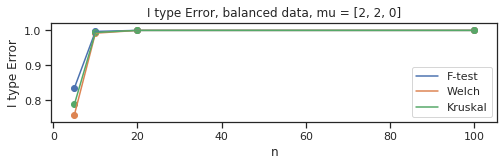

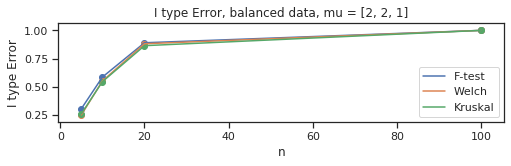

In [34]:
tmp = [5,10,20,100]
for i in range(len(gaF)):
  plt.figure(figsize=(8, 15))
  plt.subplot(len(gaF), 1, i + 1)
  plt.plot(tmp, gaF[i], label='F-test')
  plt.plot(tmp, gaW[i], label='Welch')
  plt.plot(tmp, gaK[i], label='Kruskal')
  plt.scatter(tmp, gaF[i])
  plt.scatter(tmp, gaW[i])
  plt.scatter(tmp, gaK[i])
  plt.xlabel('n')
  plt.ylabel('I type Error')
  plt.title('I type Error, balanced data, mu = %s' % mus[i])
  plt.legend()
  plt.show()

Заметим, что при смещенной выборке мощность при каждом из тестов почти одинаковая. Тем не менее, мощность при F-test лучше остальных, далее идет Уэлч, а затем Краскелл. Кроме того, когда выборки слишком маленькие <= 20, результаты довольно удручающие. С ростом же выборок мощность растет.

Теперь все то же самое для логнормального распределения.

In [0]:
def func2(n, sigma, mu):
  alpha = 0.05

  aF, aW, aK = [], [], []
  F_stat, W_stat, K_stat = [], [], []

  for i in range(len(n)):
    ni = n[i]
    Ntimes = 1000

    pFs, pWs, pKs = [], [], []
    Fs,  Ws,  Ks  = [], [], []

    for j in range(Ntimes):
      X1 = lognorm.rvs(s=1, loc=mu[0], scale=sigma[0], size=ni[0])
      X2 = lognorm.rvs(s=1, loc=mu[1], scale=sigma[1], size=ni[1])
      X3 = lognorm.rvs(s=1, loc=mu[1], scale=sigma[1], size=ni[1])

      y1 = [1 for i in range(ni[0])]
      y2 = [2 for i in range(ni[1])]
      y3 = [3 for i in range(ni[2])]
      X = np.hstack((X1, X2, X3))
      y = np.hstack((y1, y2, y3))
      df = pd.DataFrame(list(zip(X, y)), columns = ['X', 'group'])

      mod = ols(formula='X ~ C(group)', data=df).fit()
      mod = anova_lm(mod)
      Fs.append(mod['F'][0])
      pFs.append(mod['PR(>F)'][0])
      
      mod2 = pingouin.welch_anova(dv='X', between='group', data=df)
      Ws.append(mod2['F'])
      pWs.append(mod2['p-unc'][0])

      mod3 = pingouin.kruskal(dv='X', between='group', data=df)
      Ks.append(mod3['H'])
      pKs.append(mod3['p-unc'][0])

    aF.append((pFs < (alpha * np.ones(Ntimes))).sum() / Ntimes)
    aW.append((pWs < (alpha * np.ones(Ntimes))).sum() / Ntimes)
    aK.append((pKs < (alpha * np.ones(Ntimes))).sum() / Ntimes)

    F_stat.append(np.mean(Fs))
    K_stat.append(np.mean(Ks))
    W_stat.append(np.mean(Ws))

  return aF, aW, aK, F_stat, K_stat, W_stat

(а). LogNorm(0, 1), n = 5, 10, 20, 100

In [0]:
n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
mu = [0,0,0]
sigma = [1,1,1]

aF, aW, aK, F_stat, W_stat, K_stat = func2(n, sigma, mu)

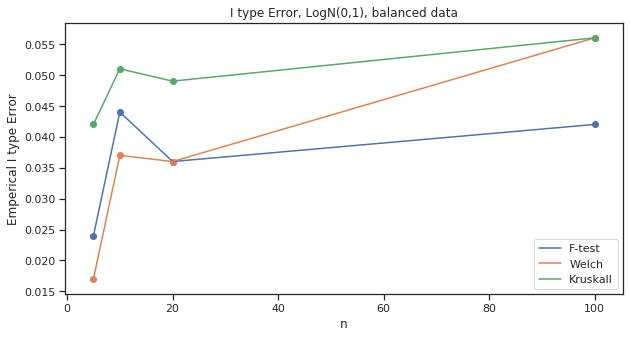

In [37]:
pvals11 = pd.DataFrame(list(aF), index=[5,10,20,100], columns=['F-test'])
pvals11['Welch'] = list(aW)
pvals11['Kruskall'] = list(aK)
pvals11

plt.figure(figsize=(10, 5))
plt.plot([5, 10, 20, 100], aF, label='F-test')
plt.plot([5, 10, 20, 100], aW, label='Welch')
plt.plot([5, 10, 20, 100], aK, label='Kruskall')
plt.scatter([5, 10, 20, 100], aF)
plt.scatter([5, 10, 20, 100], aW)
plt.scatter([5, 10, 20, 100], aK)
plt.xlabel('n')
plt.ylabel('Emperical I type Error')
plt.title('I type Error, LogN(0,1), balanced data')
plt.legend()
plt.show()

С ростом выборок уровень ошибки 1 рода на всех тестах растет.

(b). LogNorm(0, $\sigma$); n = 5, 10, 20, 100;
$ \sigma \in$ [1, 4]

In [38]:
n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
mu = [0,0,0]

sigmas = [1,1,1]
saved_sigmas = []
permuted=[]

gaF, gaW, gaK = [], [], []
gF_stat, gW_stat, gK_stat = [], [], []

for q in range(3):
  while (sigmas[0] == sigmas[1] and sigmas[1] == sigmas[2] or list(sigmas) in permuted):
    sigmas = np.random.choice([1,2,3,4], 3)
  saved_sigmas.append(list(sigmas))
  permuted.extend(list(map(list, list(permutations(sigmas)))))

  aF, aW, aK, F_stat, W_stat, K_stat = func2(n, sigmas, mu)

  gaF.append(aF)
  gaW.append(aW)
  gaK.append(aK)
  gF_stat.append(F_stat)
  gK_stat.append(K_stat)
  gW_stat.append(W_stat)

sig = []
ind = []
f = []
w = []
k = []
for j in range(3):
  sig.extend([str(saved_sigmas[j]) for i in range(4)])
  ind.extend([5,10,20,100])
  f.extend(gaF[j])
  w.extend(gaW[j])
  k.extend(gaK[j])

pvals22 = pd.DataFrame(sig, index=ind, columns=['sigma'])
pvals22['F-test'] = f
pvals22['Welch'] = w
pvals22['Kruskall'] = k
pvals22


,sigma,F-test,Welch,Kruskall
5,"[2, 2, 1]",0.035,0.019,0.044
10,"[2, 2, 1]",0.038,0.045,0.063
20,"[2, 2, 1]",0.034,0.050,0.050
100,"[2, 2, 1]",0.049,0.048,0.051
5,"[3, 4, 1]",0.037,0.037,0.067
10,"[3, 4, 1]",0.054,0.043,0.078
20,"[3, 4, 1]",0.077,0.091,0.130
100,"[3, 4, 1]",0.325,0.380,0.511
5,"[2, 4, 2]",0.085,0.077,0.153
10,"[2, 4, 2]",0.118,0.183,0.245


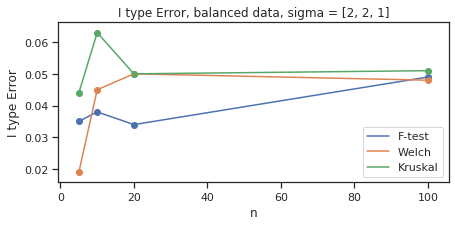

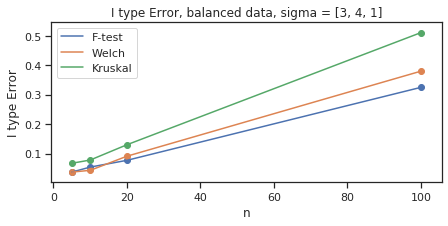

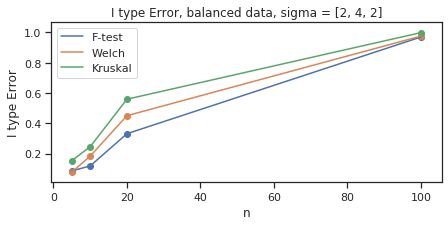

In [39]:
tmp = [5,10,20,100]
for i in range(3):
  plt.figure(figsize=(7, 10))
  plt.subplot(3, 1, i + 1)
  plt.plot(tmp, gaF[i], label='F-test')
  plt.plot(tmp, gaW[i], label='Welch')
  plt.plot(tmp, gaK[i], label='Kruskal')
  plt.scatter(tmp, gaF[i])
  plt.scatter(tmp, gaW[i])
  plt.scatter(tmp, gaK[i])
  plt.xlabel('n')
  plt.ylabel('I type Error')
  plt.title('I type Error, balanced data, sigma = %s' % sig[i + 3*i])
  plt.legend()
  plt.show()

В последнем случае при больших размерах выборок все тесты показывают себя очень плохо, в остальных случаях наоборот

(c). Несбалансированные выборки из LogNorm(0, 1)

In [0]:
mu = [0,0,0]

sigmas = [1,1,1]

n = []

for i in range(4):
  n.append(list(np.random.choice([5,10,20,100], 3)))

aF, aW, aK, F_stat, W_stat, K_stat = func2(n, sigmas, mu)

ind_n1 = [x[0] for x in n]
ind_n2 = [x[1] for x in n]
ind_n3 = [x[2] for x in n]
pvals33 = pd.DataFrame(ind_n1, columns=['n1'])
pvals33['n2'] = ind_n2
pvals33['n3'] = ind_n3
pvals33['F-test'] = list(aF)
pvals33['Welch'] = list(aW)
pvals33['Kruskall'] = list(aK)
pvals33


,n1,n2,n3,F-test,Welch,Kruskall
0,100,20,10,0.052,0.125,0.040
1,20,10,100,0.049,0.059,0.042
2,100,20,100,0.052,0.097,0.053
3,10,5,10,0.040,0.037,0.046


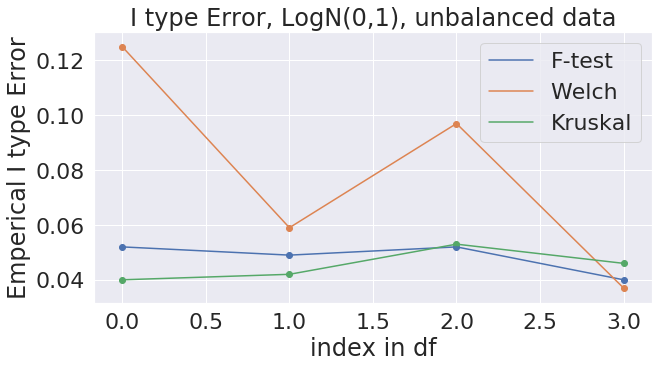

In [0]:
plt.figure(figsize=(10, 5))
x = np.arange(0, 4)
plt.plot(x, pvals33['F-test'], label='F-test')
plt.plot(x, pvals33['Welch'], label='Welch')
plt.plot(x, pvals33['Kruskall'], label='Kruskal')
plt.scatter(x, pvals33['F-test'])
plt.scatter(x, pvals33['Welch'])
plt.scatter(x, pvals33['Kruskall'])
plt.xlabel('index in df')
plt.ylabel('Emperical I type Error')
plt.title('I type Error, LogN(0,1), unbalanced data')
plt.legend()
plt.show()

Тест Уэлча ведет себя намного хуже остальных. => Для такой постановки задачи он не оч применим.

(d). LogNorm($\mu$, 1)

In [0]:
n = [[5,5,5], [10,10,10], [20,20,20], [100,100,100]]
sigmas = [1,1,1]

mus = [[0,1,2], [0,0,1], [0,0,2], [1,1,0], [1,1,2], [2,2,0], [2,2,1]]

gaF, gaW, gaK = [], [], []
gF_stat, gW_stat, gK_stat = [], [], []

for mu in mus:

  aF, aW, aK, F_stat, W_stat, K_stat = func2(n, sigmas, mu)

  gaF.append(aF)
  gaW.append(aW)
  gaK.append(aK)
  gF_stat.append(F_stat)
  gK_stat.append(K_stat)
  gW_stat.append(W_stat)

m = []
ind = []
f = []
w = []
k = []
for j in range(len(gaF)):
  m.extend([str(mus[j]) for i in range(4)])
  ind.extend([5,10,20,100])
  f.extend(gaF[j])
  w.extend(gaW[j])
  k.extend(gaK[j])

pvals44 = pd.DataFrame(m, index=ind, columns=['mus'])
pvals44['F-test'] = f
pvals44['Welch'] = w
pvals44['Kruskall'] = k
pvals44



,mus,F-test,Welch,Kruskall
5,"[0, 1, 2]",0.209,0.183,0.261
10,"[0, 1, 2]",0.260,0.286,0.530
20,"[0, 1, 2]",0.416,0.433,0.823
100,"[0, 1, 2]",0.912,0.889,1.000
5,"[0, 0, 1]",0.038,0.030,0.043
10,"[0, 0, 1]",0.029,0.027,0.032
20,"[0, 0, 1]",0.042,0.061,0.058
100,"[0, 0, 1]",0.042,0.049,0.050
5,"[0, 0, 2]",0.038,0.027,0.046
10,"[0, 0, 2]",0.047,0.038,0.054


тут тоже неверно подписан график: вместо $\alpha$ должно быть $1-\beta$

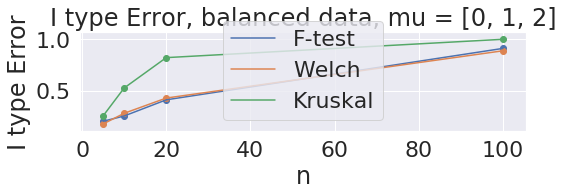

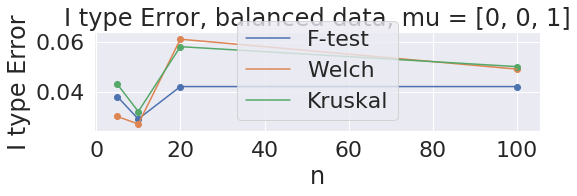

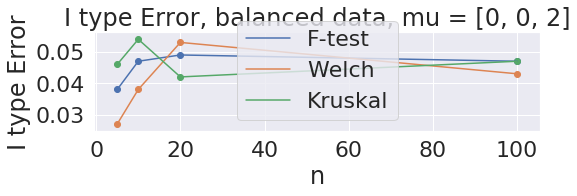

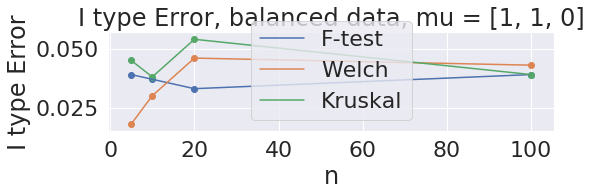

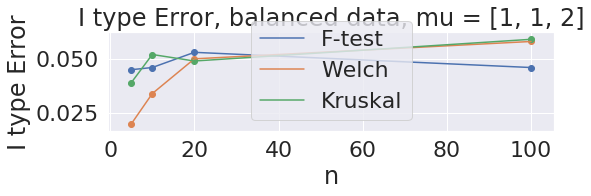

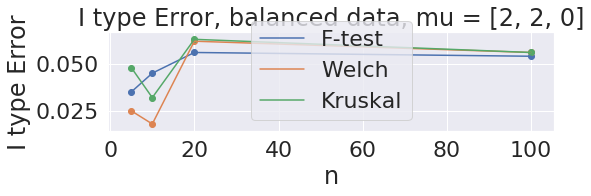

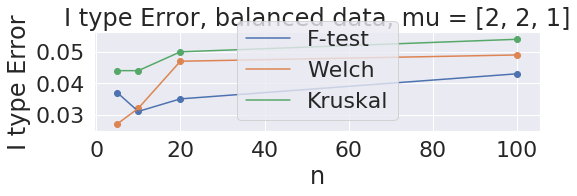

In [0]:
tmp = [5,10,20,100]
for i in range(len(gaF)):
  plt.figure(figsize=(8, 15))
  plt.subplot(len(gaF), 1, i + 1)
  plt.plot(tmp, gaF[i], label='F-test')
  plt.plot(tmp, gaW[i], label='Welch')
  plt.plot(tmp, gaK[i], label='Kruskal')
  plt.scatter(tmp, gaF[i])
  plt.scatter(tmp, gaW[i])
  plt.scatter(tmp, gaK[i])
  plt.xlabel('n')
  plt.ylabel('I type Error')
  plt.title('I type Error, balanced data, mu = %s' % mus[i])
  plt.legend()
  plt.show()

Ни один тест не показал хорошие результаты. Мощность на всех, кроме одного < 0.06. 

## **ЗАДАНИЕ 4**

In [5]:
uploaded = files.upload()

Saving fever.table.txt to fever.table.txt


In [6]:
d = pd.read_csv('fever.table.txt',delimiter='    ')
d = d.rename(columns={' A' : "A", '  B':'B', '  id':'id'})
d.columns

Index(['hours', 'A', 'B', 'id'], dtype='object')

(a). 

Так как в задании указано, что нужно воспользоваться двухфакторной моделью.

In [7]:
mod = ols(formula='hours ~ C(A) * C(B)', data=d).fit()
mod.predict(exog=dict(A=3, B=2))

0    10.275
dtype: float64

Можно проверить

In [8]:
d[(d.A == 3) & (d.B == 2)].hours.mean()

10.275

(b).

Для того, чтобы проверить нормальность полученных данных, нужно проверить на нормальность остатки(residuals)

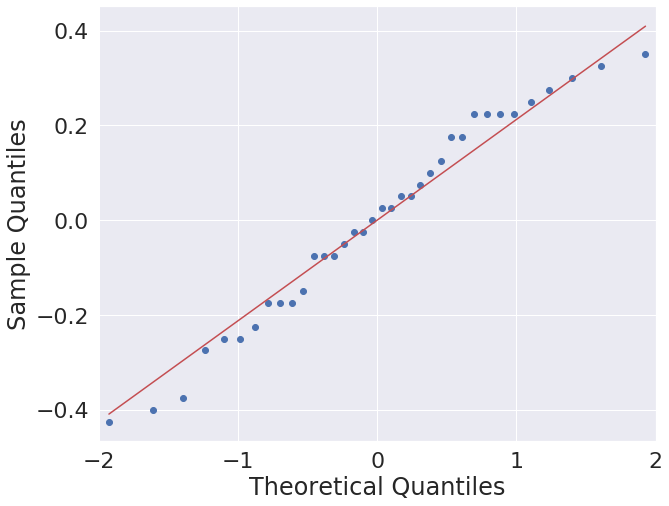

In [12]:
import statsmodels.api as sm

res = mod.resid 
fig = sm.qqplot(res, line='s')
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

Как видно из построенного QQ-графика, остатки распределены более менее нормально, так же это можно проверить тестом Шапиро

In [13]:
stats.shapiro(res)

(0.9650903940200806, 0.3068922460079193)

(с).

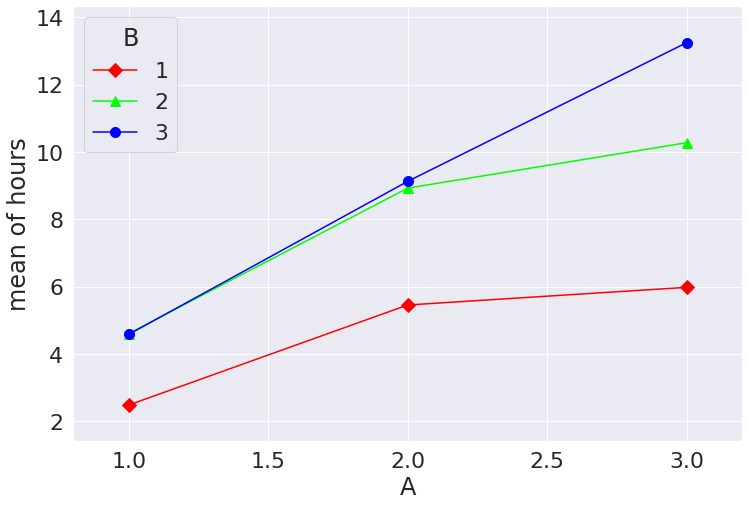

In [14]:
fig = interaction_plot(d.A, 
                       d.B, 
                       d.hours,
                       markers=['D', '^', 'o'], ms=10)
fig.set_figheight(8)
fig.set_figwidth(12)

Взаимодействие между факторами есть. Линии непараллельны.
Рассмотрим подробнее: при факторе А равном 1 или 2, разница между результатми(mean of hours) для фактора B незначительная (но даже без рассмотрения А = 3 взаимодействие наблюдается). При добавлении фактора А = 3 взаимодействие становится очевидным: для любого значения фактора А воздействие фактора B разное.

(d).

In [30]:
anova_lm(ols(formula='hours ~ C(A) + C(B) + C(A) : C(B)', data=d).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(A),2.0,220.020,110.010000,1827.858462,1.514043e-29
C(B),2.0,123.660,61.830000,1027.329231,3.348751e-26
C(A):C(B),4.0,29.425,7.356250,122.226923,6.972083e-17
Residual,27.0,1.625,0.060185,NaN,NaN


F = 122
p-value  = 6.972083e-17 < alpha=0.05
Значит мы отклоняем нулевую гипотезу о том, что нет взаимодействия факторов.

Следовательно, можно сказать, что взаимодействие факторов есть.


(e).

Проверим наличие эффектов для каждого из факторов.

Можно воспользоваться таблицей выше и QQ-плотом.

Н0 для А: не учитывая фактор В (он константный), при различных уровнях фактора А, результаты (hours) не будут различаться. 

Из таблицы выше видно, что p-value = 1.514043e-29 для А < 0.05 => отклоняем эту нулевую гипотезу.


Аналогичная Н0 будет и для B.

Тут тоже p-value = 3.348751e-26 < 0.05 => отклоням H0 для В.

То есть результаты различаются по двум факторам. Есть эффект по каждому из факторов.